# Explore here

In [47]:
# Analisis Exploratorio de Datos

# Paso 1 - Cargar base de Datos

import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [48]:
# Paso 2 - Exploracion y limpieza de Datos

# Obtener las dimensiones

data.shape

(48895, 16)

In [49]:
# Obtener información sobre tipos de datos y valores no nulos

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [10]:
# Existen un total de 48895 filas (en este caso, propiedades) y 16 columnas, de entre las que encontramos el objetivo o clase a predecir, price.
# La variable last_review y review_por_month solo tiene 38.843 instancias con valores, por lo que contendría más de 10.000 valores nulos. 
# El resto de variables cuentan con valor.
# Los datos cuentan con 10 características numéricas y 6 características categóricas.

In [50]:
# Eliminar duplicados

data.drop("id", axis = 1).duplicated().sum()

0

No hay valores duplicados con el ID, puede haber de nombre o host_id pero puede ser que un host tenga mas de una propiedad por lo tanto no es necesario trabajar con ello

In [51]:
# Conocer si existen valores nulos

data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [52]:
# Eliminar info irrelevante

data.drop(["name", "host_name", "last_review"], axis = 1, inplace = True)
data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [60]:
# Paso 3: Análisis de variables univariante

import matplotlib.pyplot as plt 
import seaborn as sns

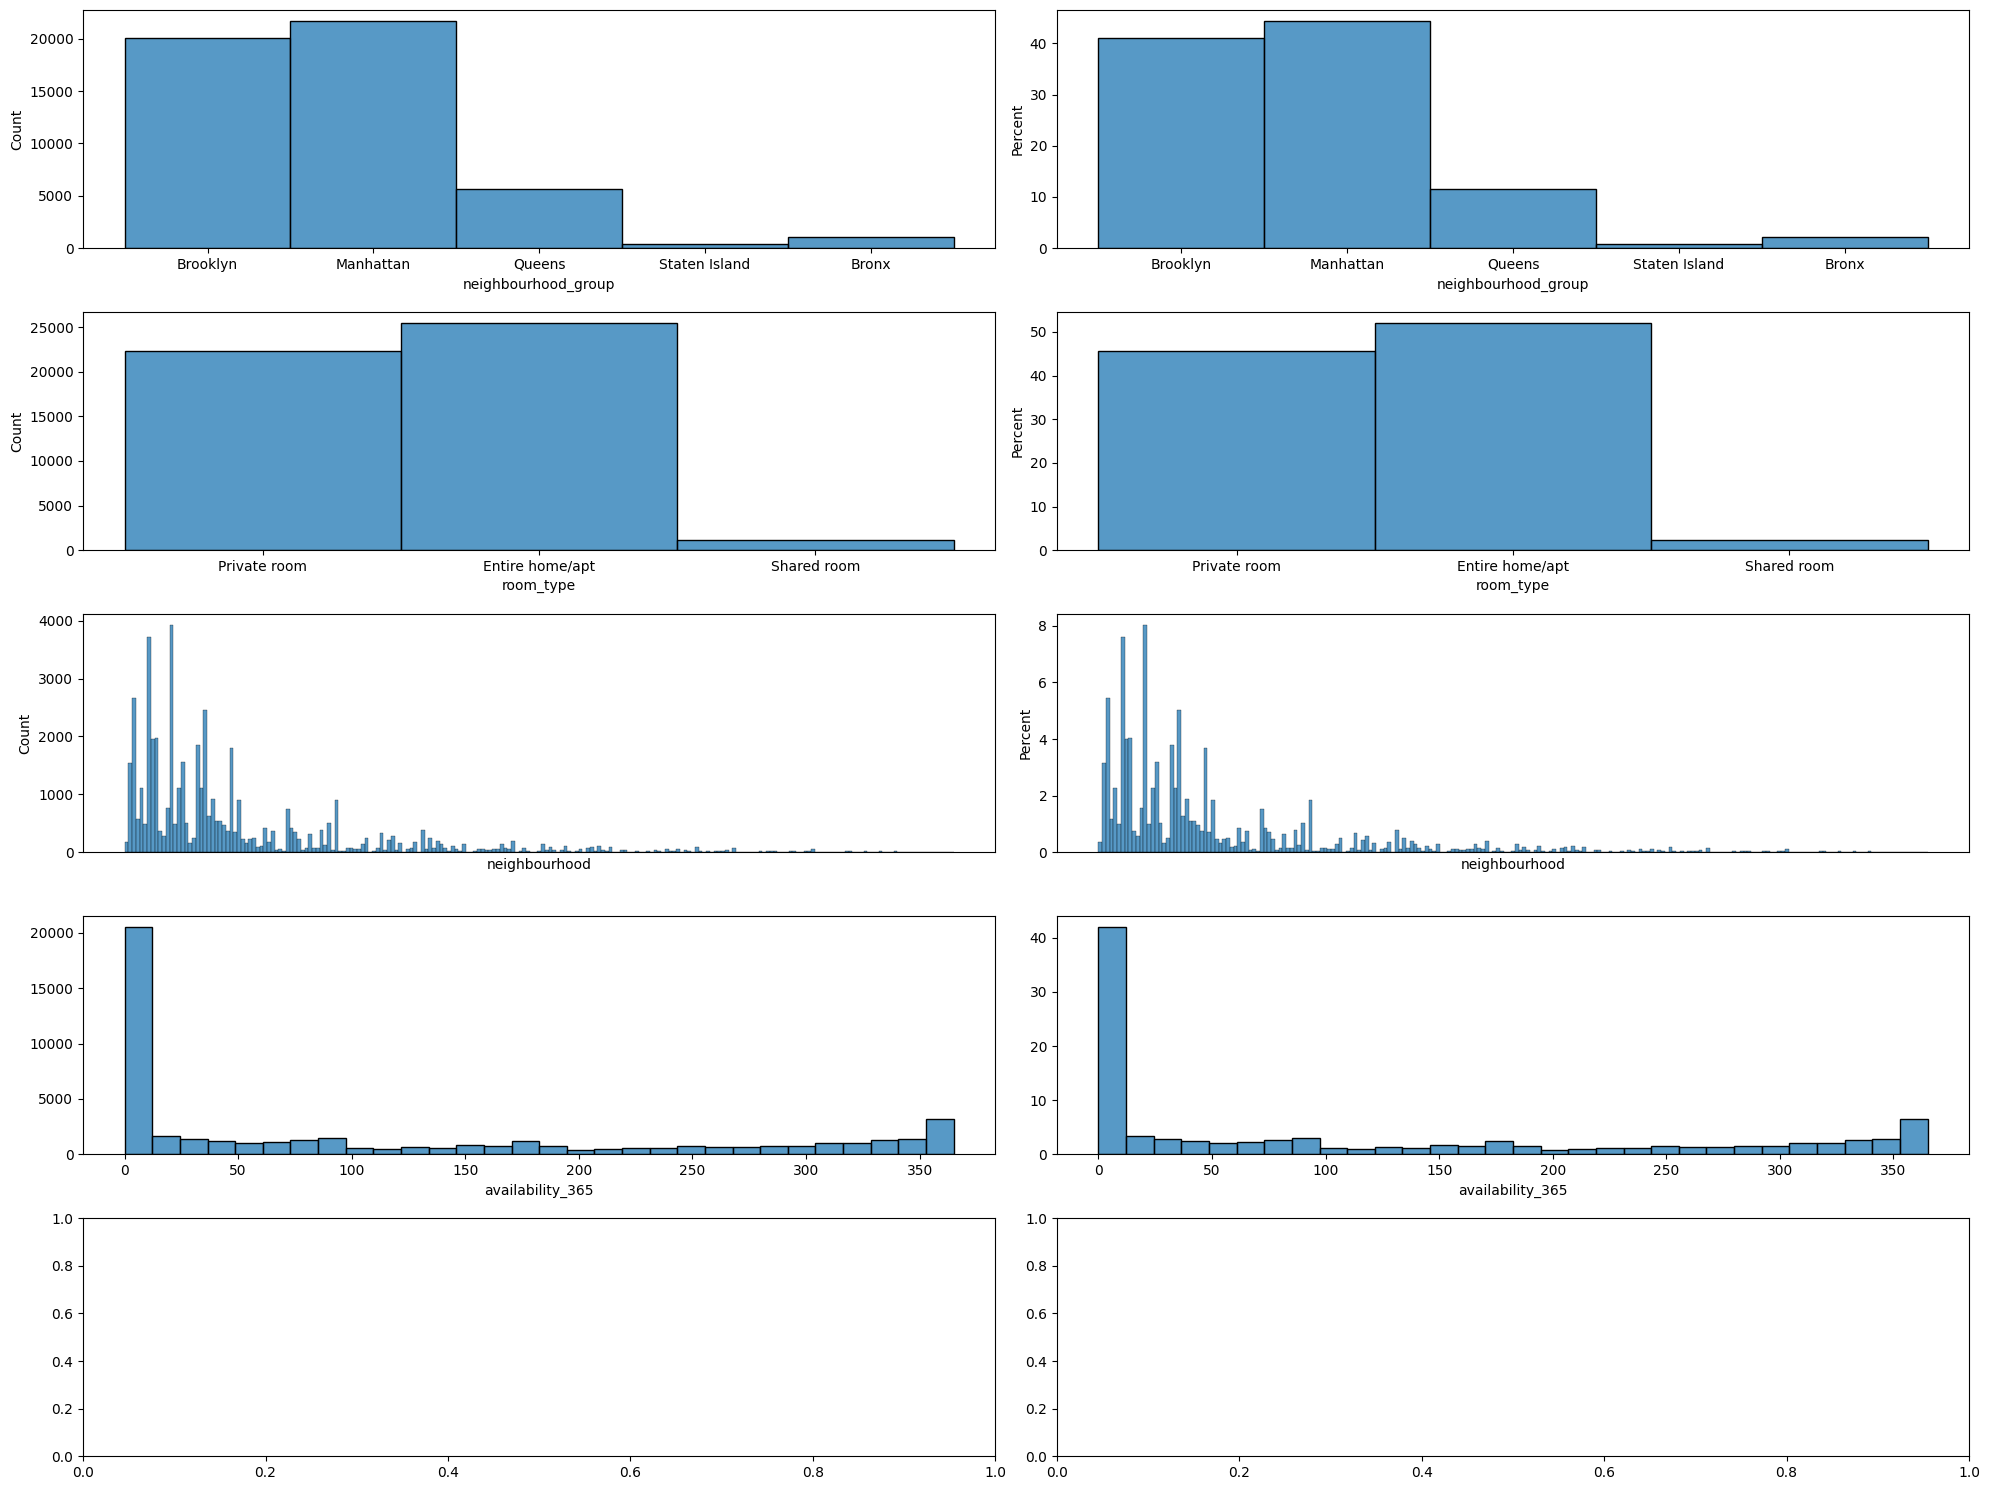

In [61]:
# Analisis de variables Categoricas

fig, axis = plt.subplots(5, 2, figsize = (20, 15))

# Crear un histograma múltiple
sns.histplot(ax = axis[0, 0], data = data, x = "neighbourhood_group")
sns.histplot(ax = axis[0, 1], data = data, x = "neighbourhood_group", stat="percent")
sns.histplot(ax = axis[1, 0], data = data, x = "room_type")
sns.histplot(ax = axis[1, 1], data = data, x = "room_type", stat="percent")
sns.histplot(ax = axis[2, 0], data = data, x = "neighbourhood").set_xticks([])
sns.histplot(ax = axis[2, 1], data = data, x = "neighbourhood", stat="percent").set_xticks([])
sns.histplot(ax = axis[3, 0], data = data, x = "availability_365").set(ylabel = None)
sns.histplot(ax = axis[3, 1], data = data, x = "availability_365", stat="percent").set(ylabel = None)



# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

* Las propiedades se dividen entre 5 grandes barrios de Ny, concentrandose la mayoria entre Manhattan y Brooklyn
* Los tipos de propiedades son 3, la mayoria Entire Home, luego Private Room y por ultimo, en una porcion muy pequeña, shared room
* Dentro de los grupos de barrios, existen 221 barrios especificios, siendo el top 5 en cantidad de propiedades:
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
* Hay casi 20.000 propiedades donde la disponibilidad de noches es 0, por lo cual deben quitarse del analisis ya que no estan disponibles
* El 25% no tiene minimo en cuanto a la cantidad de noches, pero el resto si, el cual varia entre 2 o mas.


In [62]:
data['neighbourhood'].value_counts()

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: count, Length: 221, dtype: int64

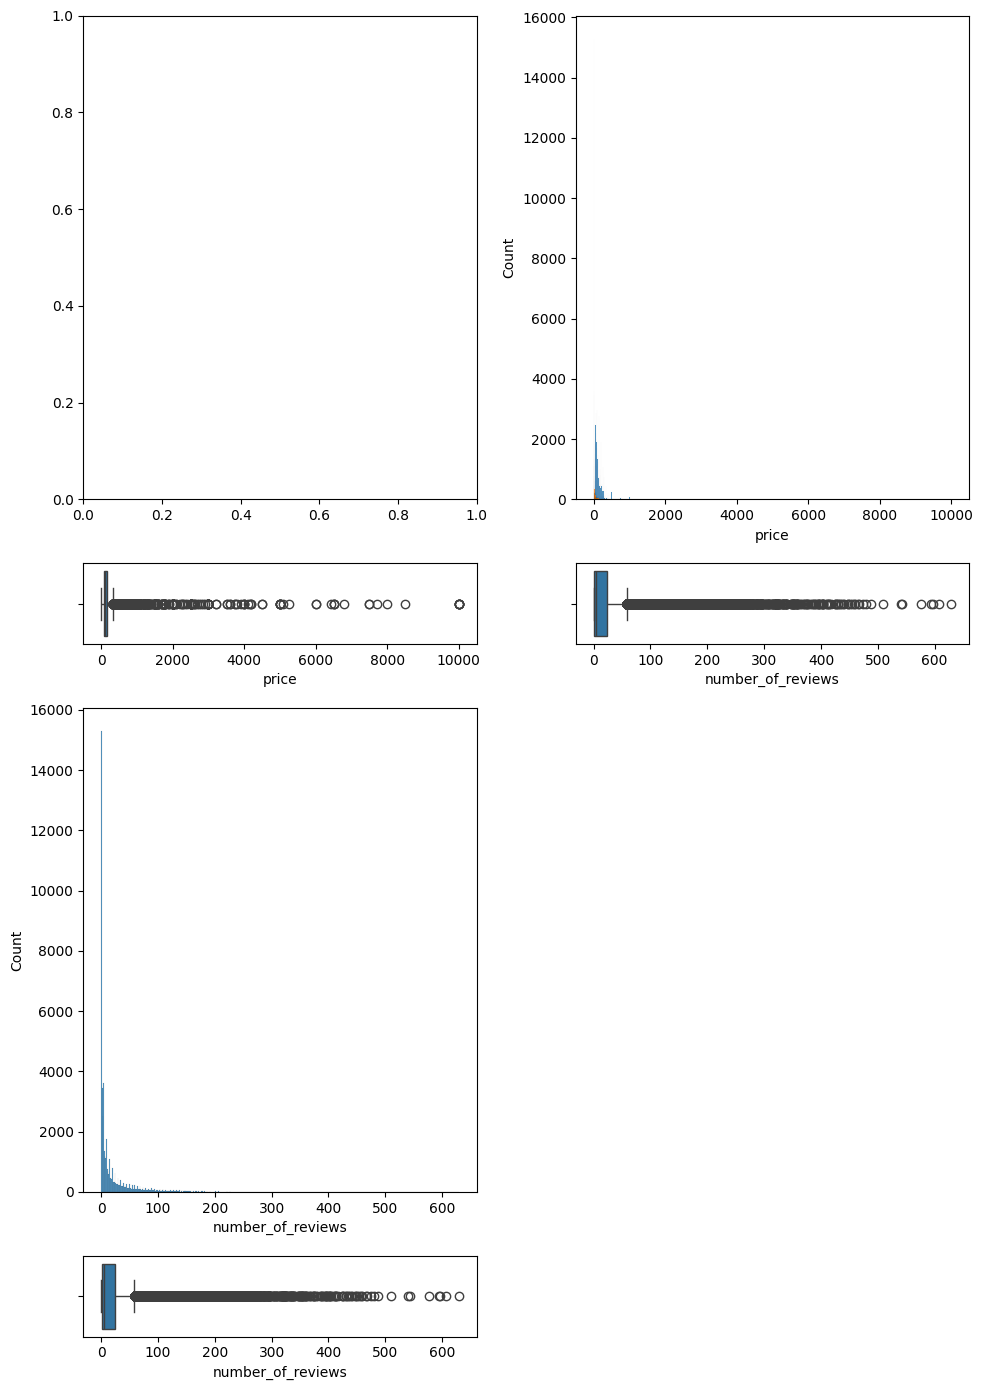

In [68]:
# Analisis de variables numericas

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 1], data = data, x = "price")
sns.boxplot(ax = axis[1, 0], data = data, x = "price")
sns.histplot(ax = axis[0, 1], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[1, 1], data = data, x = "number_of_reviews")
sns.histplot(ax = axis[2, 0], data = data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = data, x = "number_of_reviews")


# Ajustar el layout
plt.tight_layout()
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Mostrar el plot
plt.show()

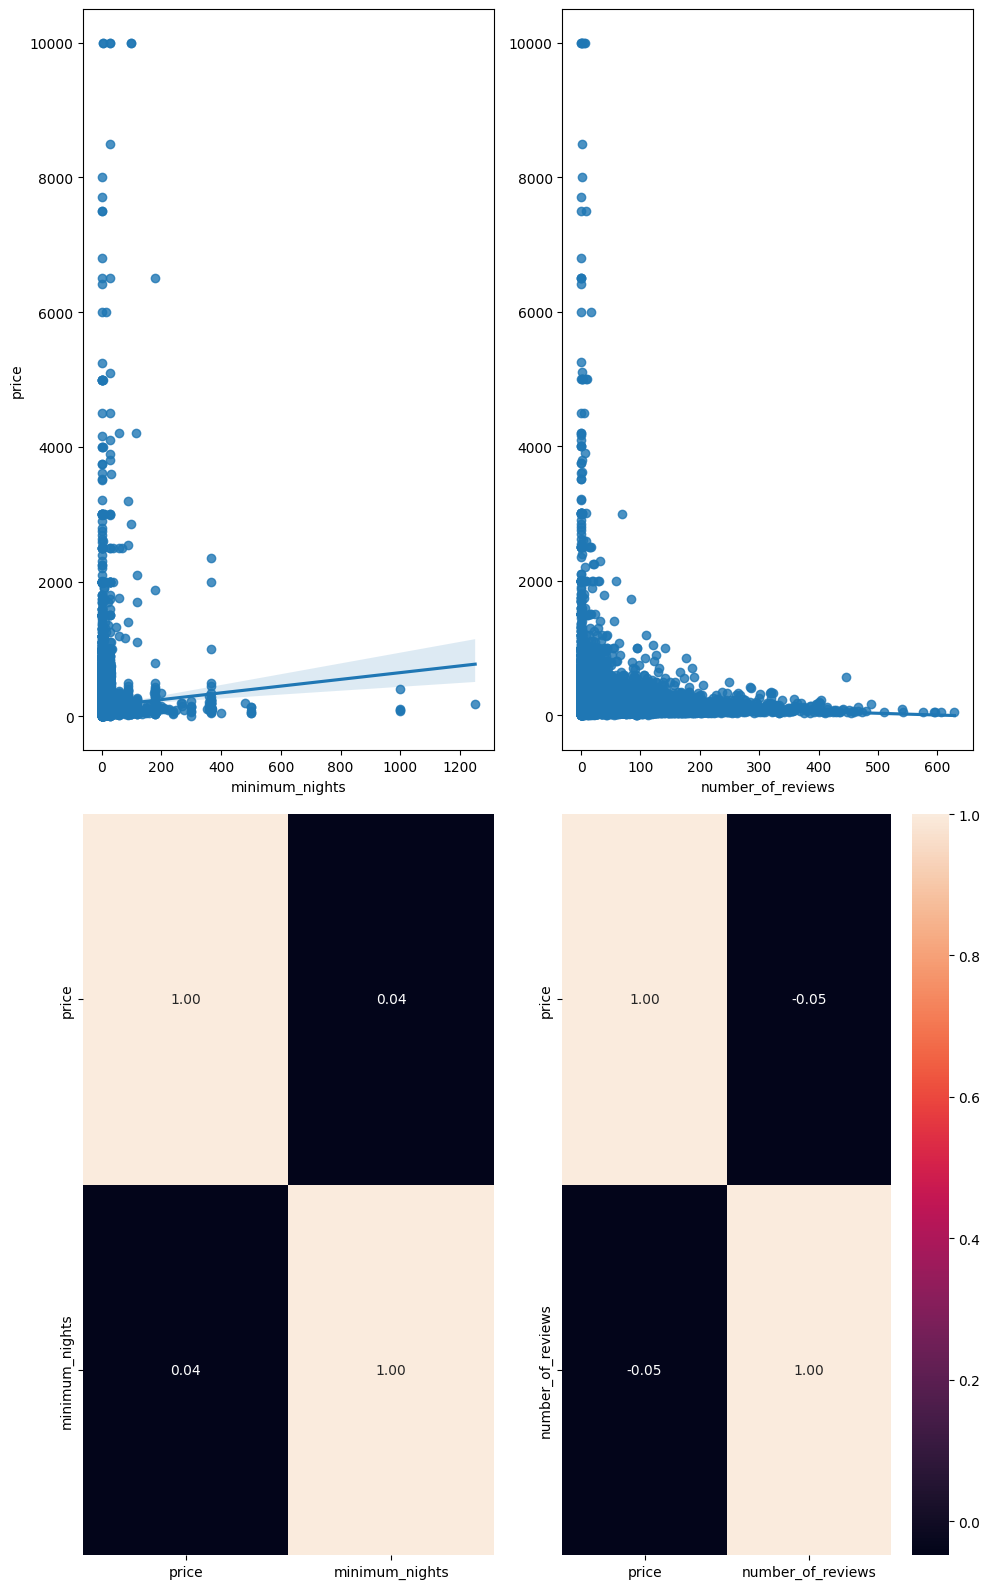

In [69]:
# Paso 4: Análisis de variables multivariante

# Analisis de variables numericas-numericas


fig, axis = plt.subplots(2, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = data, x = "minimum_nights", y = "price")
sns.heatmap(data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = data, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# fig.delaxes(axis[2, 1])
# fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

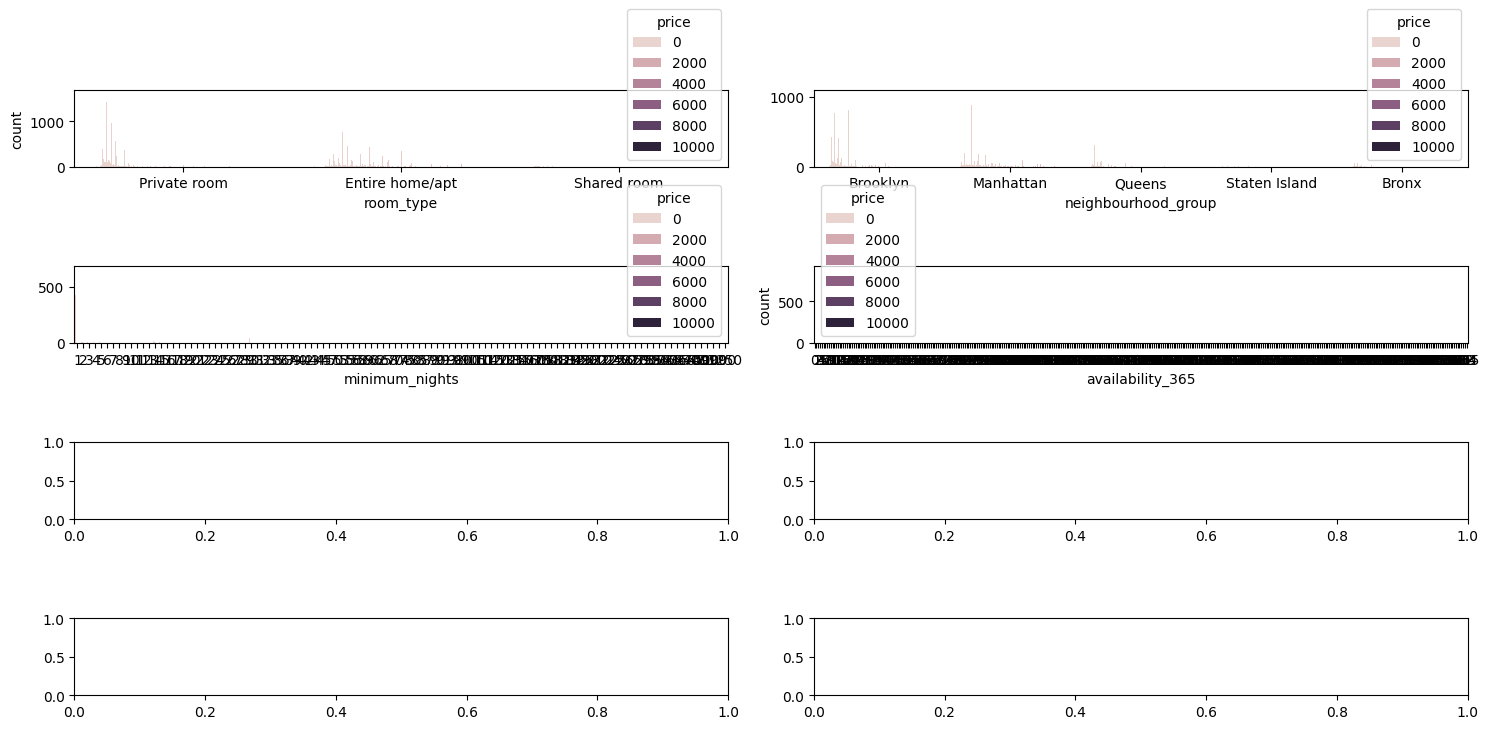

In [70]:


fig, axis = plt.subplots(4, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = data, x = "room_type", hue = "price")


sns.countplot(ax = axis[0, 1], data = data, x = "neighbourhood_group", hue = "price").set(ylabel = None)


sns.countplot(ax = axis[1, 0], data = data, x = "minimum_nights", hue = "price").set(ylabel = None)



sns.countplot(ax = axis[1, 1], data = data, x = "availability_365", hue = "price")
# sns.countplot(ax = axis[1, 1], data = data, x = "Parch", hue = "Survived").set(ylabel = None)

plt.tight_layout()
# fig.delaxes(axis[1, 1])

plt.show()

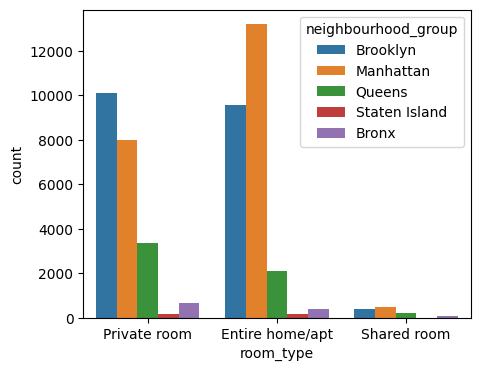

In [71]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

In [73]:
# Factorizacion

data["room_type_f"] = pd.factorize(data["room_type"])[0]
data["neighbourhood_group_f"] = pd.factorize(data["neighbourhood_group"])[0]
data["neighbourhood_f"] = pd.factorize(data["neighbourhood"])[0]
data['number_of_reviews_f']=pd.factorize(data["number_of_reviews"])[0]
data['minimum_nights_f']=pd.factorize(data["minimum_nights"])[0]
data['availability_365_f']=pd.factorize(data["availability_365"])[0]
data['price_f']=pd.factorize(data["price"])[0]
# data['Country_f']=pd.factorize(data["Country"])[0]
# data['C_f']=pd.factorize(data["C"])[0]

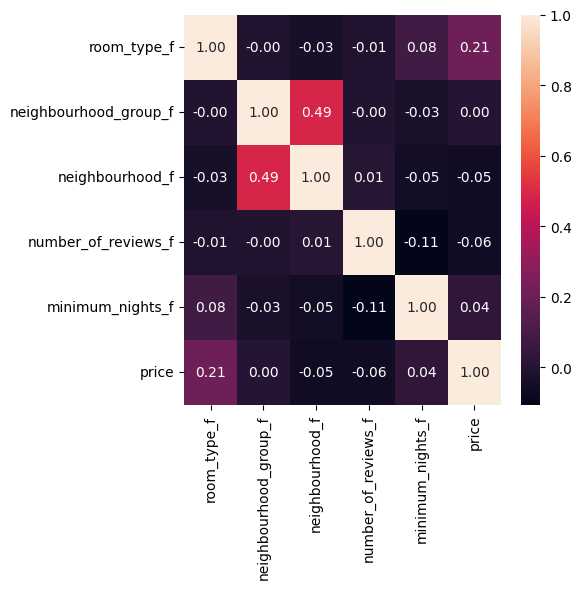

In [74]:
fig, axis = plt.subplots(figsize = (6, 6))
matriz_corr=data[["room_type_f", "neighbourhood_group_f", "neighbourhood_f", "number_of_reviews_f", 'minimum_nights_f', "price"]].corr()
#print(matriz_corr)
sns.heatmap(matriz_corr, annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

Existe una relación entre la tipología de clase (Room_type) y el precio

<!-- la edad del pasajero (Age) fuertemente negativa (los que viajaban en primera clase eran personas con alta edad) y entre la clase y la tarifa pagada (Fare), algo que tiene mucho sentido. El resto de correlaciones se mantienen con respecto a lo visto anteriormente. -->

In [75]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   host_id                         48895 non-null  int64  
 2   neighbourhood_group             48895 non-null  object 
 3   neighbourhood                   48895 non-null  object 
 4   latitude                        48895 non-null  float64
 5   longitude                       48895 non-null  float64
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  reviews_per_month               38843 non-null  float64
 11  calculated_host_listings_count  48895 non-null  int64  
 12  availability_365                

In [76]:
# Paso 5 - Ingenieria de caracteristicas

data.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f,neighbourhood_f,number_of_reviews_f,minimum_nights_f,availability_365_f,price_f
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.00000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.567113,0.786911,29.888782,74.405133,4.680908,104.687166,72.06786
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.541249,0.844386,34.676634,65.337736,6.838191,113.507109,91.33768
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000,7.500000,20.000000,0.000000,3.000000,16.00000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000,19.000000,66.000000,4.000000,60.000000,42.00000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000,37.000000,98.000000,6.000000,194.000000,83.50000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,2.000000,4.000000,220.000000,393.000000,108.000000,365.000000,673.00000


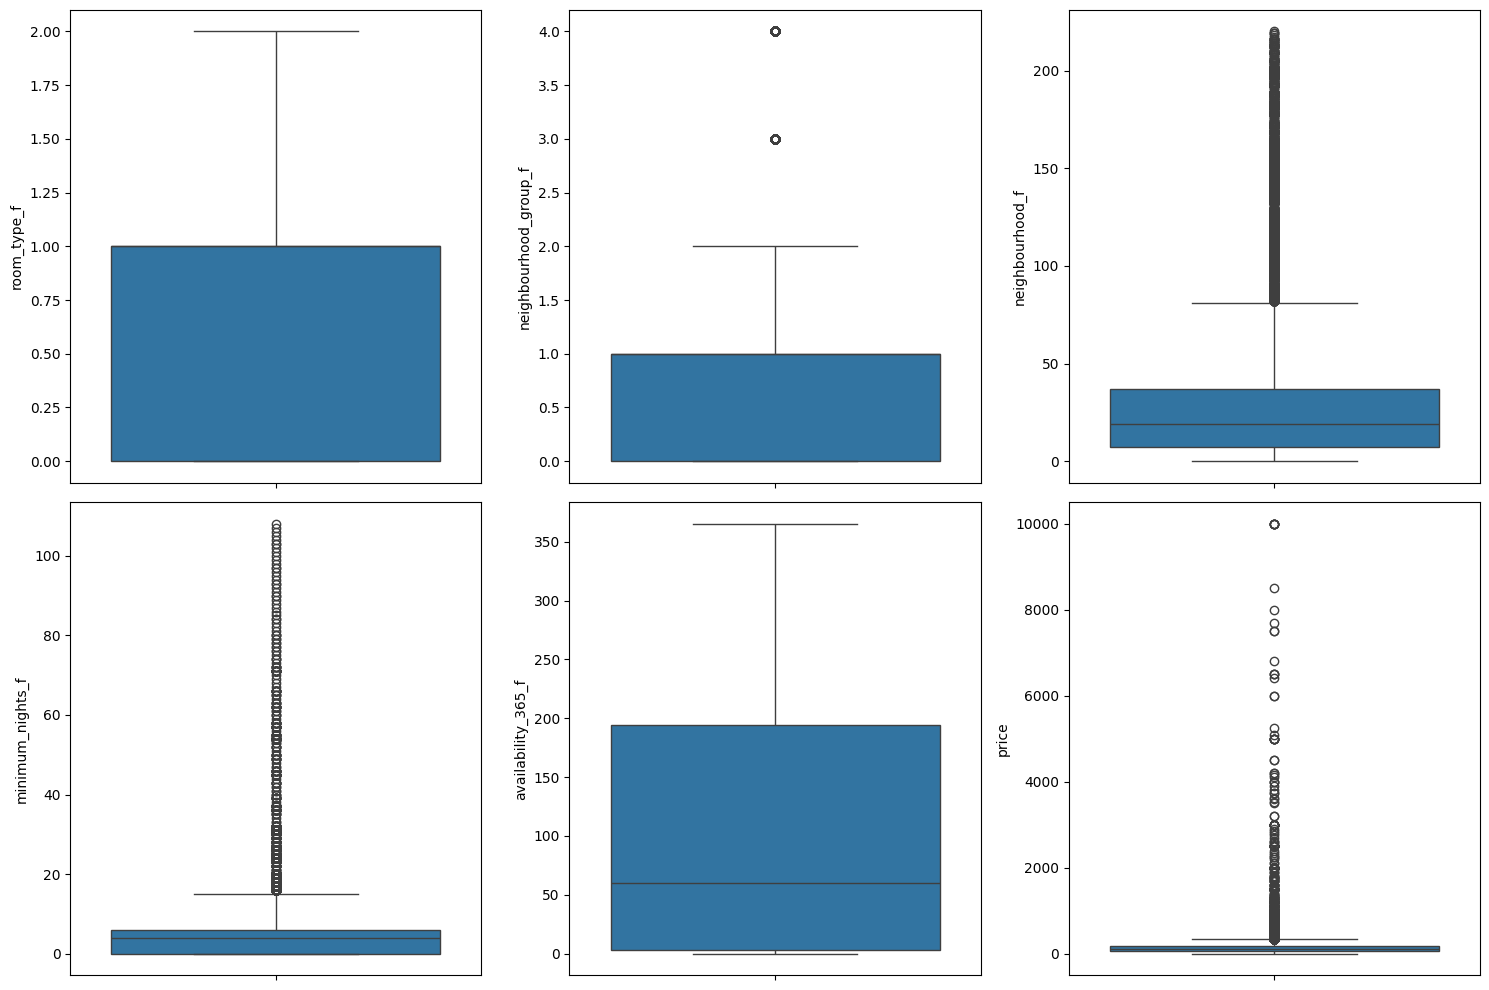

In [78]:
# Revision de Datos Atipicos

fig, axis = plt.subplots(2, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = data, y = "room_type_f")
sns.boxplot(ax = axis[0, 1], data = data, y = "neighbourhood_group_f")
sns.boxplot(ax = axis[0, 2], data = data, y = "neighbourhood_f")
sns.boxplot(ax = axis[1, 0], data = data, y = "minimum_nights_f")
sns.boxplot(ax = axis[1, 1], data = data, y = "availability_365_f")
sns.boxplot(ax = axis[1, 2], data = data, y = "price")
# sns.boxplot(ax = axis[2, 0], data = data, y = "number_of_reviews")
# sns.boxplot(ax = axis[2, 1], data = data, y = "Sex_f")
# sns.boxplot(ax = axis[2, 2], data = data, y = "Country_f")
# sns.boxplot(ax = axis[3, 0], data = data, y = "Hpw")

plt.tight_layout()
plt.show()

In [25]:
# Analisis de outliers del precio

data.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [26]:
data.loc[data.price==10000]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f,neighbourhood_f,number_of_reviews_f,minimum_nights_f,availability_365_f,price_f
9151,7003697,20582832,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,...,0.04,1,0,0,2,56,64,71,3,383
17692,13894339,5143901,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,...,0.16,1,0,1,0,20,49,5,3,383
29238,22436899,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,...,NaN,1,83,1,1,8,2,12,245,383


In [27]:
data.loc[data.price==0]

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,...,reviews_per_month,calculated_host_listings_count,availability_365,room_type_f,neighbourhood_group_f,neighbourhood_f,number_of_reviews_f,minimum_nights_f,availability_365_f,price_f
23161,18750597,8993084,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,...,0.05,4,28,0,0,6,68,6,244,488
25433,20333471,131697576,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,...,2.56,4,127,0,4,168,227,4,227,488
25634,20523843,15787004,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,...,0.71,5,0,0,0,21,61,4,3,488
25753,20608117,1641537,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,...,0.53,2,0,0,0,20,78,4,3,488
25778,20624541,10132166,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,...,0.15,1,73,1,0,12,97,5,305,488
25794,20639628,86327101,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,...,4.28,6,176,0,0,6,170,0,322,488
25795,20639792,86327101,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,...,4.37,6,232,0,0,6,197,0,142,488
25796,20639914,86327101,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,...,4.35,6,222,0,0,6,197,0,84,488
26259,20933849,13709292,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,...,NaN,1,0,1,1,5,2,1,3,488
26841,21291569,101970559,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,...,0.11,6,333,2,0,21,64,12,10,488


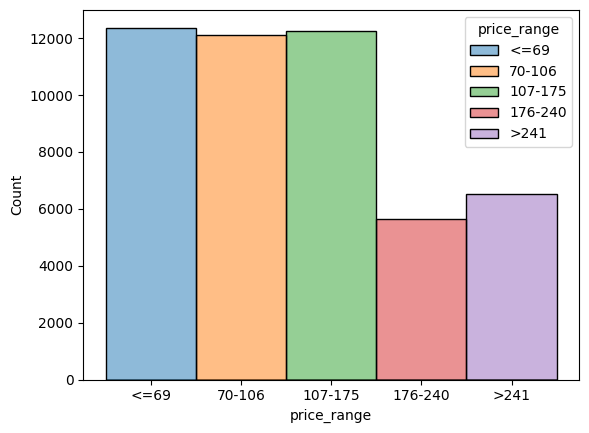

In [28]:


data['price_range'] = pd.cut(data['price'],bins=[0,69,106,175,240, float('inf')],
                labels=['<=69', '70-106', '107-175','176-240','>241'],include_lowest=True)

sns.histplot(x='price_range',hue='price_range',data=data)

plt.show()

In [79]:
# IQR por precio

price_stats = data["price"].describe()
price_stats

price_iqr = price_stats["75%"] - price_stats["25%"]
upper_limit = price_stats["75%"] + 1.5 * price_iqr
lower_limit = price_stats["25%"] - 1.5 * price_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(price_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 334.0 y -90.0, con un rango intercuartílico de 106.0


In [80]:
data = data[data["price"] > 0]
count_0 = data[data["price"] == 0].shape[0]
count_1 = data[data["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


In [81]:
# Analisis de outliers de las noches minimas

nights_stats = data["minimum_nights"].describe()
nights_stats

count    48884.000000
mean         7.029887
std         20.512224
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [82]:
# IQR por noches minimas
nights_iqr = nights_stats["75%"] - nights_stats["25%"]

upper_limit = nights_stats["75%"] + 1.5 * nights_iqr
lower_limit = nights_stats["25%"] - 1.5 * nights_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")

The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [83]:
# Limpiando los outliers

data = data[data["minimum_nights"] <= 15]

In [84]:
count_0 = data[data["minimum_nights"] == 0].shape[0]
count_1 = data[data["minimum_nights"] == 1].shape[0]
count_2 = data[data["minimum_nights"] == 2].shape[0]
count_3 = data[data["minimum_nights"] == 3].shape[0]
count_4 = data[data["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12717
Count of 2:  11693
Count of 3:  7998
Count of 4:  3302


In [85]:
# Análisis de valores faltantes
data.isnull().sum().sort_values(ascending=False)

reviews_per_month                 7811
host_id                              0
availability_365_f                   0
minimum_nights_f                     0
number_of_reviews_f                  0
neighbourhood_f                      0
neighbourhood_group_f                0
room_type_f                          0
availability_365                     0
calculated_host_listings_count       0
id                                   0
number_of_reviews                    0
minimum_nights                       0
price                                0
room_type                            0
longitude                            0
latitude                             0
neighbourhood                        0
neighbourhood_group                  0
price_f                              0
dtype: int64

In [86]:
data.isnull().sum().sort_values(ascending=False) / len(data)

reviews_per_month                 0.180539
host_id                           0.000000
availability_365_f                0.000000
minimum_nights_f                  0.000000
number_of_reviews_f               0.000000
neighbourhood_f                   0.000000
neighbourhood_group_f             0.000000
room_type_f                       0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
price_f                           0.000000
dtype: float64

In [89]:
# Escalado de valores

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [96]:
num_variables = ['number_of_reviews','neighbourhood_group_f','room_type_f', 'minimum_nights_f',
       'availability_365']
# scaler = MinMaxScaler()
# scal_features = scaler.fit_transform(data[num_variables])
# df_scal = pd.DataFrame(scal_features, index = data.index, columns = num_variables)
# df_scal["price"] = data["price"]
# df_scal.head()

# Dividimos el conjunto de datos en muestras de train y test
# Dividimos el conjunto de datos en muestras de train y test
X = data.drop("price", axis = 1)[num_variables]
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,number_of_reviews,neighbourhood_group_f,room_type_f,minimum_nights_f,availability_365
42032,19,1,2,0,208
32759,12,1,0,8,354
27831,13,0,0,0,184
43410,15,1,1,5,146
37689,16,0,1,4,276


In [97]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scal = scaler.transform(X_train)
X_train_scal = pd.DataFrame(X_train_scal, index = X_train.index, columns = num_variables)

X_test_scal = scaler.transform(X_test)
X_test_scal = pd.DataFrame(X_test_scal, index = X_test.index, columns = num_variables)

X_train_scal.head()

,number_of_reviews,neighbourhood_group_f,room_type_f,minimum_nights_f,availability_365
42032,0.030207,0.25,1.0,0.000000,0.569863
32759,0.019078,0.25,0.0,0.148148,0.969863
27831,0.020668,0.00,0.0,0.000000,0.504110
43410,0.023847,0.25,0.5,0.092593,0.400000
37689,0.025437,0.00,0.5,0.074074,0.756164
